In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

In [10]:
d = pd.read_csv('../data/marketing_campaign.csv')

In [11]:
d.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,MntTotal,Income_norm,MntWines_norm,MntFruits_norm,MntMeatProducts_norm,MntFishProducts_norm,MntSweetProducts_norm,MntGoldProds_norm,exp_group
0,5524,1957,Graduation,Single,58138,0,0,9/4/12,58,635,...,1,1617,35.954236,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0
1,4855,1974,PhD,Together,30351,1,0,6/6/13,19,14,...,1,46,659.804348,0.304348,0.000000,0.521739,0.065217,0.065217,0.043478,0
2,2114,1946,PhD,Single,82800,0,0,11/24/12,23,1006,...,1,1315,62.965779,0.765019,0.016730,0.087452,0.044867,0.051711,0.034221,1
3,7373,1952,PhD,Divorced,46610,0,2,10/29/12,8,96,...,1,302,154.337748,0.317881,0.039735,0.317881,0.109272,0.072848,0.142384,0
4,2968,1943,PhD,Divorced,48948,0,0,2/1/13,53,437,...,1,902,54.266075,0.484479,0.008869,0.228381,0.177384,0.054324,0.046563,1


In [12]:
d[['exp_group', 'Response']]

,exp_group,Response
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
2211,1,0
2212,0,0
2213,0,0
2214,0,0


In [13]:
d.groupby(['exp_group'])['Response'].mean()

exp_group
0    0.133032
1    0.167417
Name: Response, dtype: float64

In [14]:
proportions_ztest

<function statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)>

In [19]:
succ1 = d[d.exp_group==1].Response.sum()
succ0 = d[d.exp_group==0].Response.sum()

nobs1 = len(d[d.exp_group==1])
nobs0 = len(d[d.exp_group==0])

In [20]:
proportions_ztest([succ1, succ0], [nobs1, nobs0])

(2.264882366520813, 0.023519899140969507)

In [21]:
d

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,MntTotal,Income_norm,MntWines_norm,MntFruits_norm,MntMeatProducts_norm,MntFishProducts_norm,MntSweetProducts_norm,MntGoldProds_norm,exp_group
0,5524,1957,Graduation,Single,58138,0,0,9/4/12,58,635,...,1,1617,35.954236,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0
1,4855,1974,PhD,Together,30351,1,0,6/6/13,19,14,...,1,46,659.804348,0.304348,0.000000,0.521739,0.065217,0.065217,0.043478,0
2,2114,1946,PhD,Single,82800,0,0,11/24/12,23,1006,...,1,1315,62.965779,0.765019,0.016730,0.087452,0.044867,0.051711,0.034221,1
3,7373,1952,PhD,Divorced,46610,0,2,10/29/12,8,96,...,1,302,154.337748,0.317881,0.039735,0.317881,0.109272,0.072848,0.142384,0
4,2968,1943,PhD,Divorced,48948,0,0,2/1/13,53,437,...,1,902,54.266075,0.484479,0.008869,0.228381,0.177384,0.054324,0.046563,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,8372,1974,Graduation,Married,34421,1,0,7/1/13,81,3,...,0,30,1147.366667,0.100000,0.100000,0.233333,0.200000,0.066667,0.300000,1
2212,10870,1967,Graduation,Married,61223,0,1,6/13/13,46,709,...,0,1341,45.654735,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,0
2213,4001,1946,PhD,Together,64014,2,1,6/10/14,56,406,...,0,444,144.175676,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,0
2214,7270,1981,Graduation,Divorced,56981,0,0,1/25/14,91,908,...,0,1241,45.915391,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,0


In [24]:
d.groupby(['exp_group']).agg({'MntTotal':['mean', 'median']})

MntTotal       
                 mean median
exp_group                   
0          602.460633  404.0
1          611.665167  382.0

/tmp/ipykernel_28292/1676428853.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['MntTotal'])


<AxesSubplot: xlabel='MntTotal', ylabel='Density'>

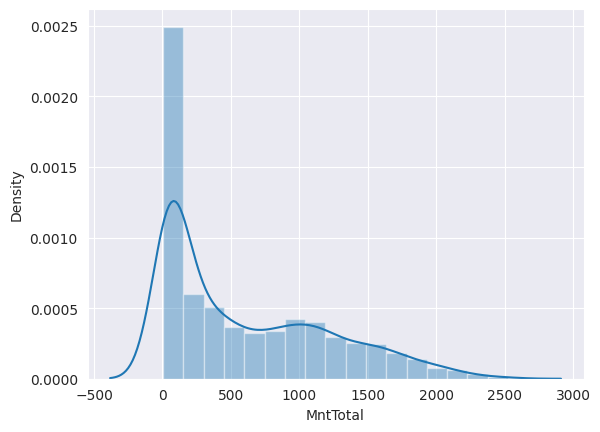

In [29]:
sns.distplot(d['MntTotal'])

In [44]:
ttest_ind(d[d.exp_group==0]['MntTotal'], d[d.exp_group==1]['MntTotal'])

Ttest_indResult(statistic=-0.3592725417012167, pvalue=0.7194254740326176)